In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

For color image, convert to YUV, apply histogram equalization, then convert back: https://stackoverflow.com/a/38312281/3820738

In [2]:
img = cv2.imread('C:\\Users\\Nam Le\\sunsetsmall.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

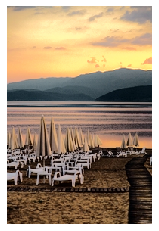

In [3]:
plt.imshow(img_output)
plt.axis("off")
#plt.show()
plt.savefig('histogramequlization_sunset', dpi=300)

Q: Why are there difference between original image when read in with cv2 (OpenCV) vs Pillow (Image.open)?

A: While reading a JPEG image, `image_np` and `image_cv` may be little difference because the libjpeg verison mat be different in OpenCV and Pillow.
https://stackoverflow.com/a/55096766/3820738

In [4]:
img = cv2.imread('C:\\Users\\Nam Le\\flower.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

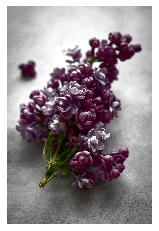

In [5]:
plt.imshow(img_output)
plt.axis("off")
#plt.show()
plt.savefig('histogramequlization_flower', dpi=300)

In [6]:
img = cv2.imread('C:\\Users\\Nam Le\\house.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

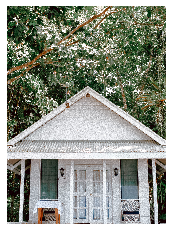

In [7]:
plt.imshow(img_output)
plt.axis("off")
#plt.show()
plt.savefig('histogramequlization_house', dpi=300)

In [8]:
img = cv2.imread('C:\\Users\\Nam Le\\leaf.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

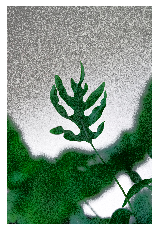

In [9]:
plt.imshow(img_output)
plt.axis("off")
#plt.show()
plt.savefig('histogramequlization_leaf', dpi=300)